# Session 1: Introduction to Image Processing and Image-Based Intelligence

### Lab Objective: Understanding Basic Image Operations

#### 1. Install Required Libraries
Run the following command to install necessary libraries in your environment:
```bash
!pip install opencv-python matplotlib numpy scikit-image
```

In [2]:
! pip install opencv-python matplotlib numpy scikit-image

Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: c:\program files\python38\python.exe -m pip install --upgrade pip


**Q1: Load an image using OpenCV and display it using Matplotlib.**

Use the following code to load and display the image. Replace `your_image_path.jpg` with the path of an image you want to use.

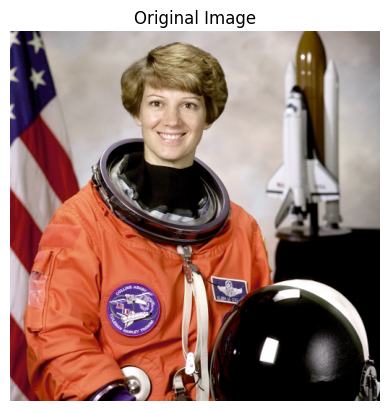

In [3]:
import cv2
import matplotlib.pyplot as plt
from skimage.data import astronaut
import numpy as np

# Load image
# img = cv2.imread('your_image_path.jpg')
img = astronaut()

# Display image using Matplotlib
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()
    

**Q2: Convert the loaded color image to grayscale and display it.**

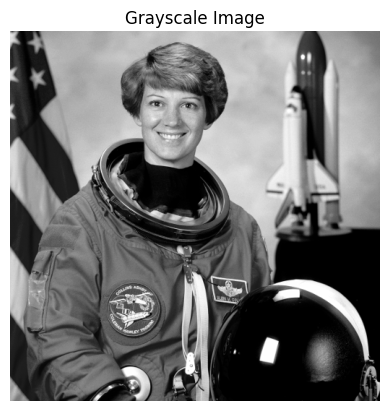

In [4]:
# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display grayscale image
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()
    

**Q3: Use OpenCV's pre-trained Haar Cascade classifier to detect faces in the grayscale image. Draw rectangles around detected faces.**

You may need to experiment with different images to see better results.

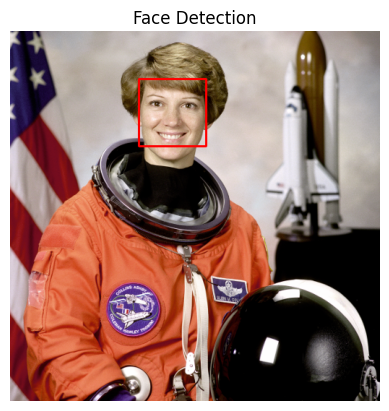

In [5]:

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

# Copy the image to a new variable
detect_img = img.copy()

# Draw rectangles around faces
for (x, y, w, h) in faces:
    cv2.rectangle(detect_img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Show image with detected faces
plt.imshow(detect_img)
plt.title("Face Detection")
plt.axis('off')
plt.show()
    

**Q4: Resize the image to half of its original size and display the result.**

Original Image Shape: (512, 512, 3), Resized Image Shape: (256, 256, 3)


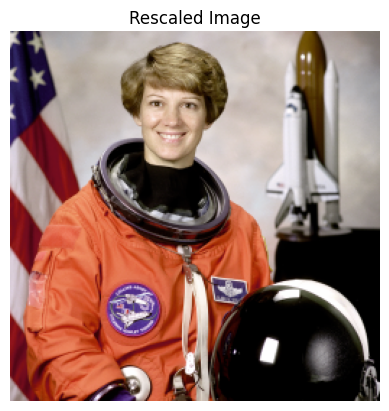

In [6]:
# Resize image to half the original size
resized_img = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2))

print(f"Original Image Shape: {img.shape}, Resized Image Shape: {resized_img.shape}")

# Display resized image
plt.imshow(resized_img)
plt.title("Rescaled Image")
plt.axis('off')
plt.show()

**Q5: Plot the histogram of the grayscale image to show the intensity distribution of the pixels.**

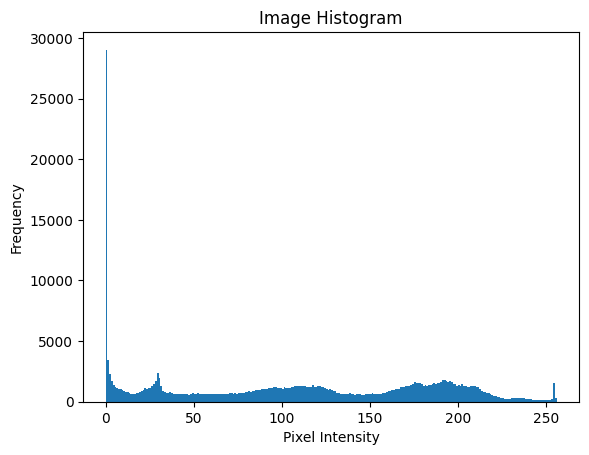

In [7]:
# Calculate histogram for grayscale image
plt.hist(gray_img.ravel(), bins=256, range=[0,256])
plt.title("Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

**Q6: Split the image into its Blue, Green, and Red channels and display each one separately.**

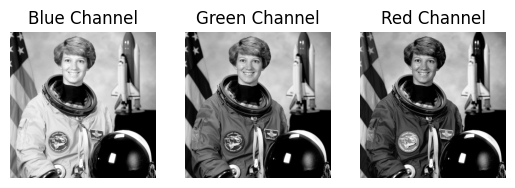

In [8]:
# Split image into B, G, R channels
b, g, r = cv2.split(img)

# Plot each channel
plt.subplot(131)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")
plt.axis('off')

plt.subplot(132)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")
plt.axis('off')

plt.subplot(133)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")
plt.axis('off')

plt.show()

**Q7: Downscale the image to a smaller resolution and then upscale it back to the original size. Display the upscaled image.**

Original Image Shape: (512, 512, 3), Upscaled Image Shape: (512, 512, 3)


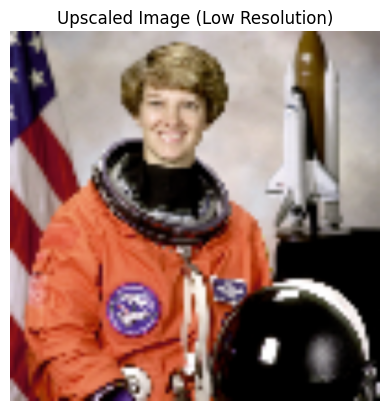

In [9]:
# Downscale the image
downscaled_img = cv2.resize(img, (100, 100))

# Upscale the image back to original size
upscaled_img = cv2.resize(downscaled_img, (img.shape[1], img.shape[0]))

print(f"Original Image Shape: {img.shape}, Upscaled Image Shape: {upscaled_img.shape}")

# Display upscaled image
plt.imshow(upscaled_img)
plt.title("Upscaled Image (Low Resolution)")
plt.axis('off')
plt.show()

**Q8: Modify the contrast of the image using OpenCV's `convertScaleAbs()` function.**

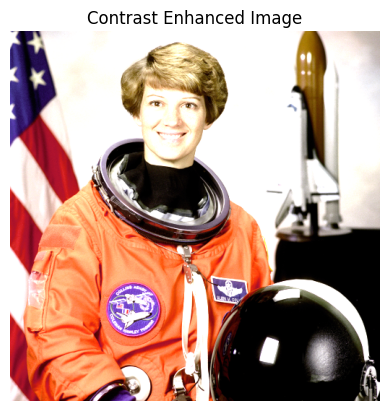

In [10]:
# Increase contrast using alpha (contrast control)
alpha = 1.5  # Simple contrast control
beta = 0     # Simple brightness control

# Apply contrast adjustment
contrast_img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Display contrast adjusted image
plt.imshow(contrast_img)
plt.title("Contrast Enhanced Image")
plt.axis('off')
plt.show()

**Q9: Modify the brightness of the image by increasing pixel intensity using the `convertScaleAbs()` function.**

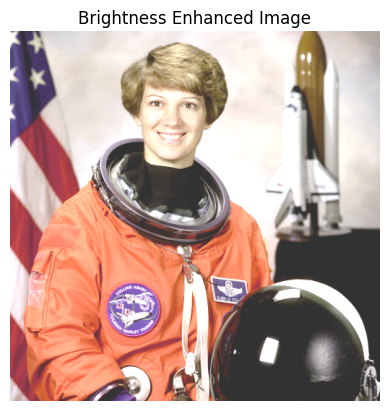

In [11]:
# Increase brightness using beta
beta = 50  # Brightness control

# Apply brightness adjustment
bright_img = cv2.convertScaleAbs(img, alpha=1, beta=beta)

# Display brightness adjusted image
plt.imshow(bright_img)
plt.title("Brightness Enhanced Image")
plt.axis('off')
plt.show()

**Q10: Convert the image to HSV color space and display the Hue, Saturation, and Value channels.**

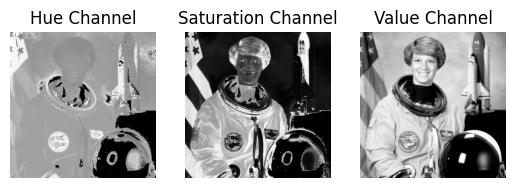

In [12]:
# Convert image to HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split HSV image into channels
h, s, v = cv2.split(hsv_img)

# Plot each channel
plt.subplot(131)
plt.imshow(h, cmap='gray')
plt.title("Hue Channel")
plt.axis('off')

plt.subplot(132)
plt.imshow(s, cmap='gray')
plt.title("Saturation Channel")
plt.axis('off')

plt.subplot(133)
plt.imshow(v, cmap='gray')
plt.title("Value Channel")
plt.axis('off')

plt.show()

# Session 1: TP
**In this TP you will implement the following image processing operations from scratch:**
1. Invert an image
2. Convert an RGB image to grayscale
3. Compute image histogram
3. Flip an image horizontally
4. Rotate an image by 90 degrees
5. Crop an image

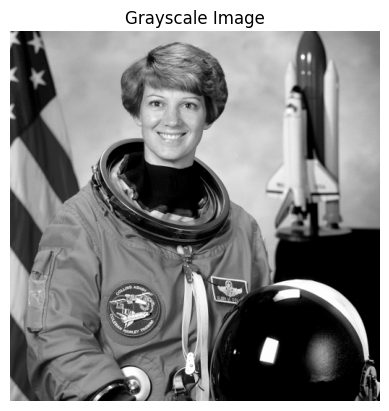

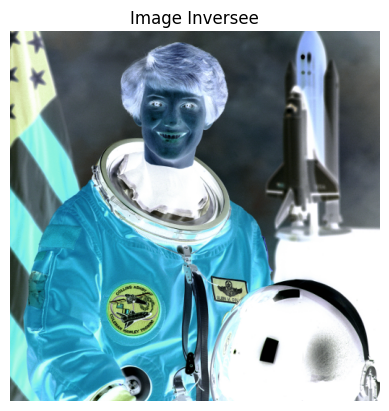

In [13]:
img = astronaut()

# All the following functions should be implemented from scratch do not use OpenCV functions
# Function to invert image
def invert_image(img):
    # Convert image to numpy array
    gray_img = np.array(img)
    width, height, _ = gray_img.shape
    # Loop over each pixel in the original image
    for i in range(width):
        for j in range(height):
            # Get the RGB values of the pixel
            r, g, b = gray_img[i, j]
            # Invert the RGB values
            gray_img[i, j] = (255 - r, 255 - g, 255 - b)
    return gray_img

# Function to convert RGB to grayscale
def convert_to_gray(img):
    # Convert image to numpy array
    gray_img = np.array(img)
    width, height, _ = gray_img.shape
    # Loop over each pixel in the original image
    for i in range(width):
        for j in range(height):
            # Get the RGB values of the pixel
            r, g, b = gray_img[i, j]
            # Calculate the average of the RGB values
            avg = int(0.299 * r + 0.587 * g + 0.114 * b)
            # Assign the average value to the corresponding pixel in the grayscale image
            gray_img[i, j] = (avg, avg, avg)
    return gray_img

# Display the images
plt.imshow(convert_to_gray(img))
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

plt.imshow(invert_image(img))
plt.title("Image Inversee")
plt.axis('off')
plt.show()



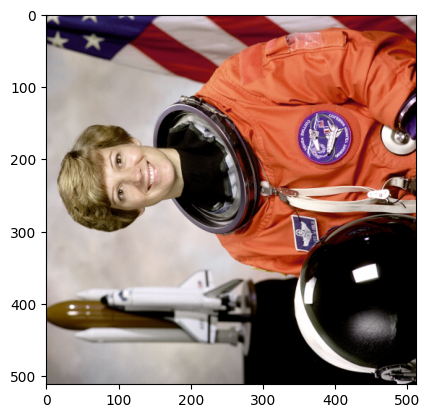

In [51]:

# Function to compute image histogram
def compute_histogram(img):
    # Convert image to grayscale if it is not already
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Create an array to store the histogram values
    hist = [0] * 256
    
    # Loop over each pixel in the image
    width, height = img.shape
    for i in range(width):
        for j in range(height):
            # Increment the corresponding bin in the histogram
            hist[img[i, j]] += 1
    
    return hist

# Function to flip image horizontally
def flip_image(img):
    # Reverse the order of columns in the image
    flipped_img = img[::-1, :]

    return flipped_img

def flip_vertical(img):
    # Reverse the order of rows in the image
    flipped_img = img[:, ::-1]
    return flipped_img

def transpose_image(img):
    # Create a blank image with the transposed dimensions
    transposed_img = np.zeros((img.shape[1], img.shape[0], img.shape[2]), dtype=img.dtype)

    # Loop over each pixel in the original image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Copy the pixel value to the transposed image
            transposed_img[j, i] = img[i, j]

    return transposed_img

# Function to rotate image by 90 degrees clockwise
def rotate_image(img):
    # Step 1: Transpose the image
    transposed_img = transpose_image(img)

    # Step 2: Flip the transposed image horizontally
    rotated_img = flip_vertical(flip_image(transposed_img[::-1][:]))

    return rotated_img

# Function to crop image
def crop_image(img, x, y, w, h):
    # Crop the image using the specified coordinates
    cropped_img = img[y:y+h, x:x+w]

    return cropped_img

# Test the implemented functions
# 1. Invert image


### Display inverted image

# 2. Convert RGB to grayscale

### Display grayscale image

# 3. Compute histogram for grayscale image

### Plot histogram
hist = compute_histogram(img)
#plt.plot(hist)

# 4. Flip image horizontally
plt.imshow(flip_image(img))
### Display flipped image

# 5. Rotate image by 90 degrees clockwise
plt.imshow(transpose_image(img))
### Display rotated image
#plt.imshow(rotate_image(img))
# 6. Crop image
#plt.imshow(crop_image(img, 100, 100, 200, 200))
### Display cropped image